# Ecuaciones diferenciales y sistemas dinámicos

__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.

__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [1]:
using PyPlot

In [2]:
#Partimos de lo desarrollado en Tarea_12:

function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
    end;

function runge_kutta(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        t2 = i*h+h/2
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t2)
        k3 = f(x+(h/2)*k2,t2)
        k4 = f(x+h*k3,t)
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end;

In [3]:
#Primero con método Euler
#La función que queremos resolver.
f(x,t)=[x[2], -1.0*x[1]-x[2]]

#Graficamos [0,10] con h=0.01
list=0:0.01:10;

#Aqui vamos a guardar las soluciones con condiciones iniciales x(0)=0 y x^.(0)=1
soluciones_condiciones_iniciales_euler=euler(f,list,[1,0]);

#De manera similar a la tarea 12, se guarda en listas
listx1_euler=map(x->x[1],soluciones_condiciones_iniciales_euler);
listx2_euler=map(x->x[2],soluciones_condiciones_iniciales_euler);

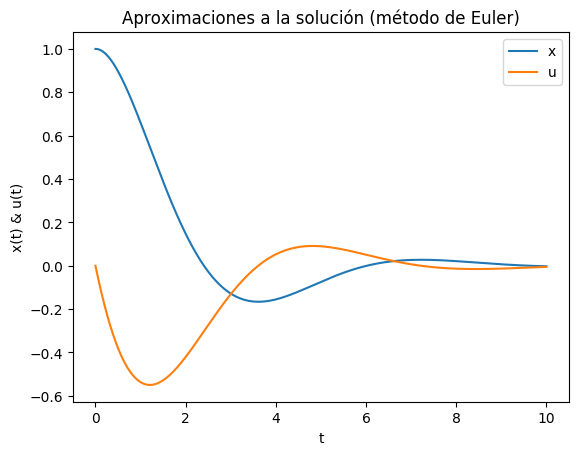

In [4]:
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la solución (método de Euler)")
plot(list,listx1_euler, label="x");
plot(list,listx2_euler, label="u");
legend();

In [5]:
#Ahora con Runge-Kutta
#Aqui vamos a guardar las soluciones con condiciones iniciales x(0)=0 y x^.(0)=1
soluciones_condiciones_iniciales_kutta=runge_kutta(f,list,[1,0]);

#Guardamos las soluciones en lists y la solución teórica tambien
listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);

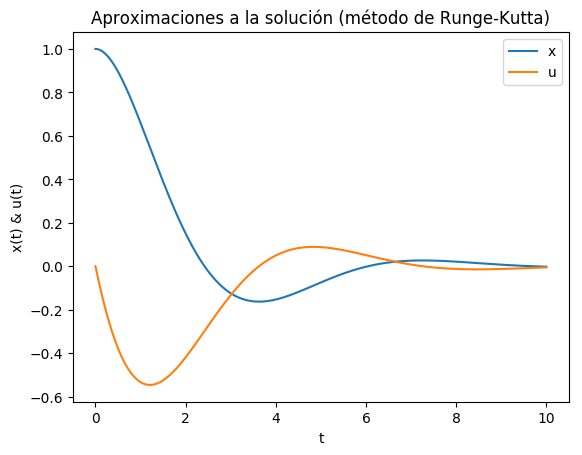

In [6]:
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la solución (método de Runge-Kutta)")
plot(list,listx1_kutta, label="x");
plot(list,listx2_kutta, label="u");
legend();

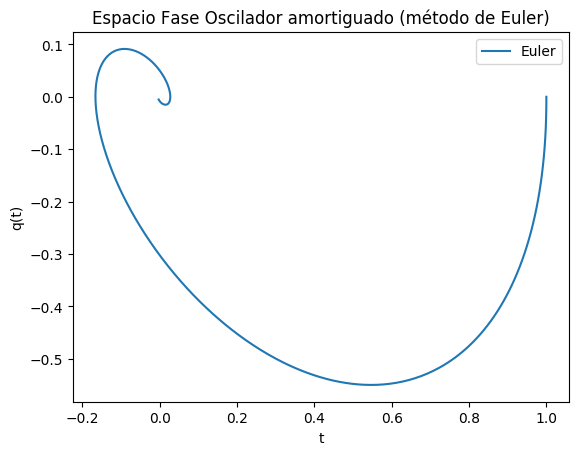

In [7]:
#finalmente graficamos:
xlabel("t")
ylabel("q(t)")
title("Espacio Fase Oscilador amortiguado (método de Euler)")
plot(listx1_euler,listx2_euler, label="Euler");
legend();

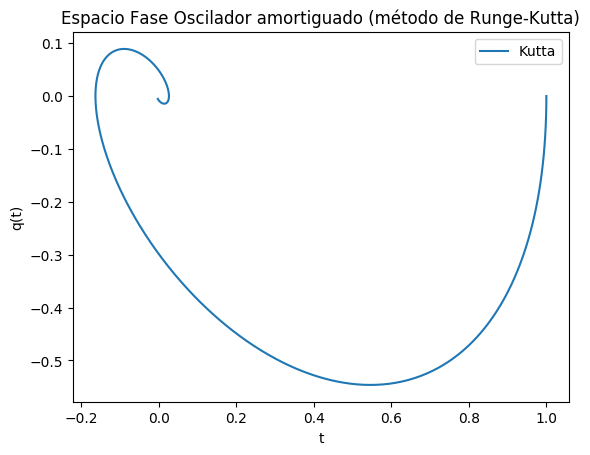

In [8]:
xlabel("t")
ylabel("q(t)")
title("Espacio Fase Oscilador amortiguado (método de Runge-Kutta)")
plot(listx1_kutta,listx2_kutta, label="Kutta");
legend();

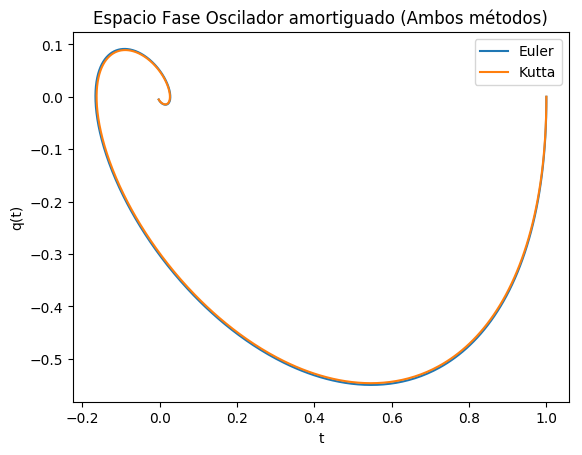

In [9]:
xlabel("t")
ylabel("q(t)")
title("Espacio Fase Oscilador amortiguado (Ambos métodos)")
plot(listx1_euler,listx2_euler, label="Euler");
plot(listx1_kutta,listx2_kutta, label="Kutta");
legend();

_Para este caso, las soluciones resultan ser practicamente iguales._

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

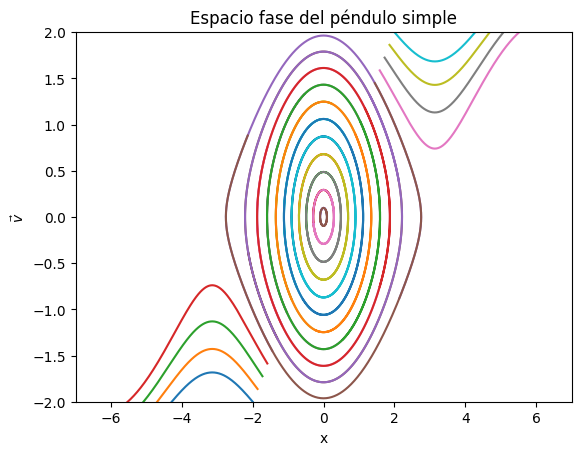

In [10]:
#Dos listas con puros randomize en los cuales se introducirán en un ciclo for para ir graficando uno a uno. Conviene mas usar lisnpace que rand para observar lo que le sucede al espacio fase
randoms1=linspace(-2,2,30)
randoms2=linspace(-2,2,30)

ñ(x,t)=[x[2],-sin.(x[1])]

list=0:0.01:10;

for i in 1:length(randoms1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(ñ,list,[randoms1[i],randoms2[i]]);
    listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    
    xlabel("x")
    ylabel(L"\vec{v}")   
    title("Espacio fase del péndulo simple")
    xlim(-7,7)
    ylim(-2,2)
    plot(listx1_kutta,listx2_kutta);
end;

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [11]:
#Esto es en 1d. Sólo es necesario:
function j(x,t)
    return x^2-1
end;

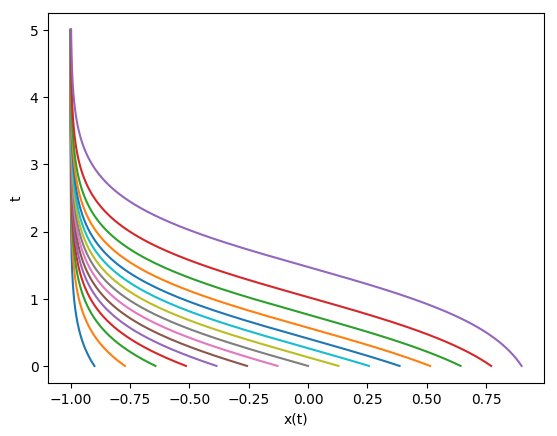

In [12]:
randoms3=linspace(-.9,.9,15)

lista = 0:0.01:5

for i in 1:length(randoms3)
    kutta = runge_kutta(j,lista,randoms3[i])
    xlabel("x(t)")
    ylabel("t")   
    title("")
    plot(kutta,lista);
end

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [13]:
#La funcion dada:
function z(x,t)
    return x^2
    end;

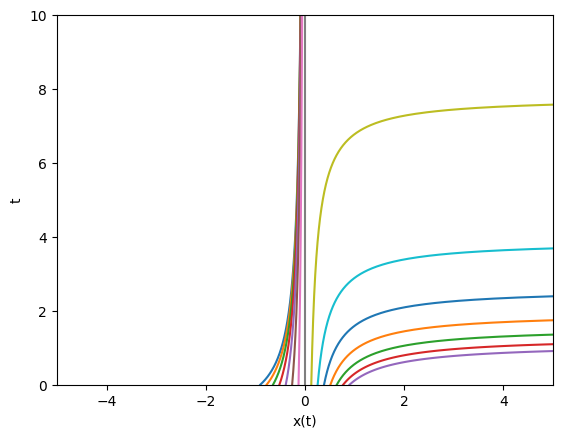

In [14]:
randoms4=linspace(-10,10,15)
lista = 0:0.01:10
for i in 1:length(randoms4)
    kutta = runge_kutta(z,lista,randoms3[i])
    xlabel("x(t)")
    ylabel("t")
    xlim(-5,5)
    ylim(0,10)
    title("")
    plot(kutta,lista);
end;

_Cero es el punto fijo, el cual no es ni atractor ni repulsor_

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=c=1$, $b=d=0$
* $a=c=-1$, $b=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

Podemos ver al sistema de ecuaciones de la siguiente manera:

$$\frac{dx}{dt}=ax+by$$

$$\frac{dy}{dt}cx+dy$$


Para $a=c=1$, $b=d=0$

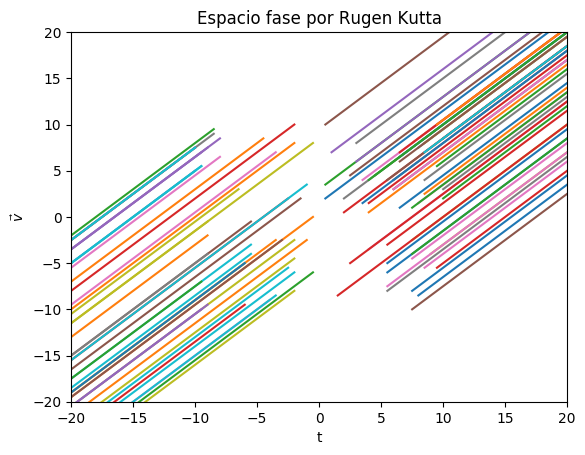

In [15]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
uno(x,t)=[x[1],x[1]] # = [ax[1]+bx[2],cx[1]+dx[2]] donde x[1]=x | x[2]=y

for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(uno,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=c=-1$, $b=d=0$

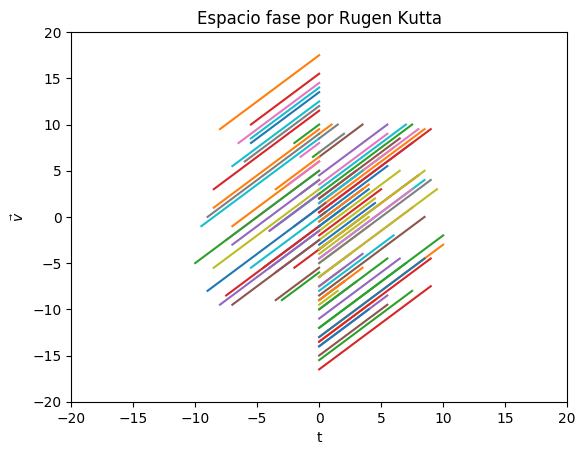

In [16]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
dos(x,t)=[-x[1],-x[1]] # = [ax[1]+bx[2],cx[1]+dx[2]] donde x[1]=x | x[2]=y

for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)        #Aquí conviene mas verlo con random, dentro del ciclo for por supuesto.
    soluciones_condiciones_iniciales_kutta=runge_kutta(dos,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=1$, $b=-2$, $c=d=0$

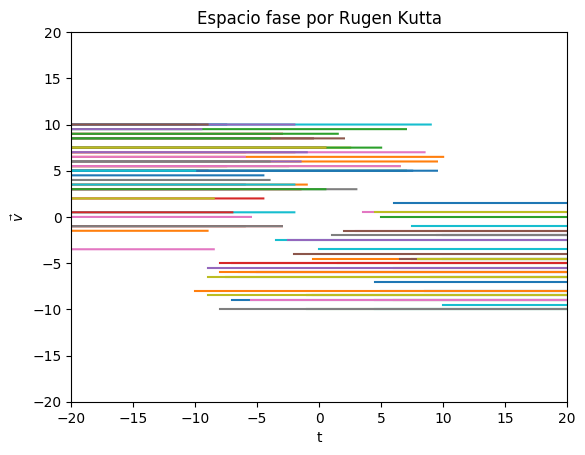

In [17]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
tres(x,t)=[x[1]-2*x[2],0]

for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(tres,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=1$, $b=-0.5$, $c=d=0$

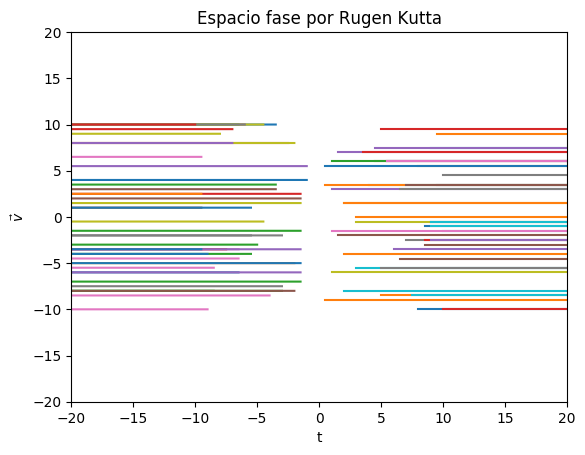

In [18]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
cuatro(x,t)=[x[1]-0.5*x[1],0] # = [ax[1]+bx[2],cx[1]+dx[2]] donde x[1]=x | x[2]=y

for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(cuatro,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=d=0$, $b=-c=1$

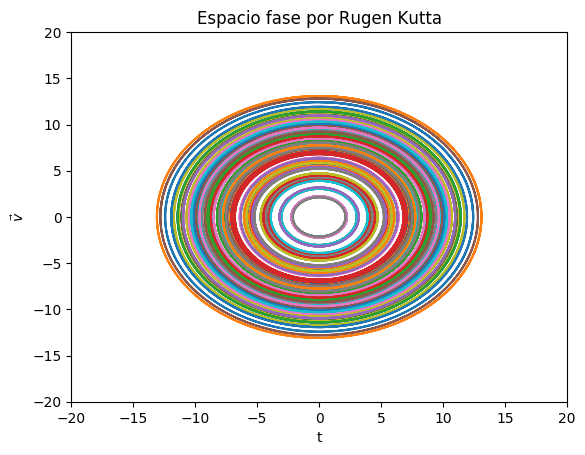

In [19]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
cinco(x,t)=[-x[2],x[1]]  # = [ax[1]+bx[2],cx[1]+dx[2]] donde x[1]=x | x[2]=y
 
for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(cinco,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=d=1$, $b=-c=1$

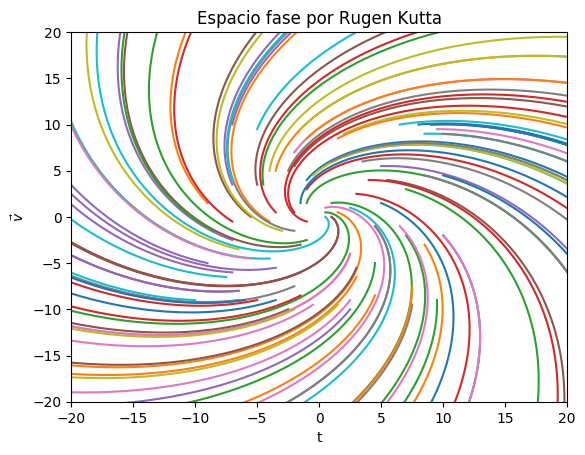

In [20]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
seis(x,t)=[x[1]+x[2],-x[1]+x[2]]  # = [ax[1]+bx[2],cx[1]+dx[2]] donde x[1]=x | x[2]=y
 
for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(seis,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=d=-1$, $b=-c=1$

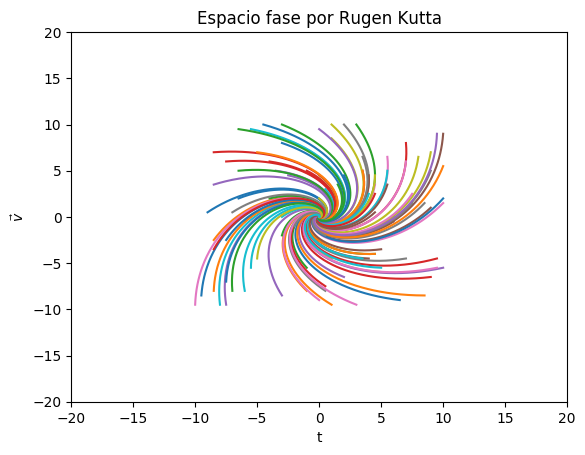

In [21]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
siete(x,t)=[-x[1]+x[2],-x[1]-x[2]]
 
for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(siete,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=d=-1$, $b=-c=-1$

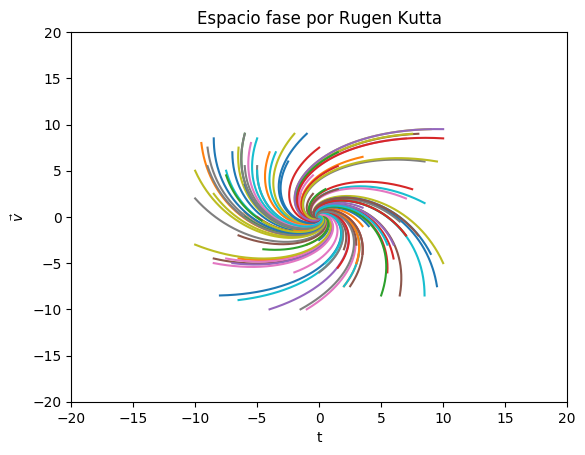

In [22]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
ocho(x,t)=[-x[1]-x[2],x[1]-x[2]]
 
for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(ocho,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=b=1$, $b=4,c=-2$

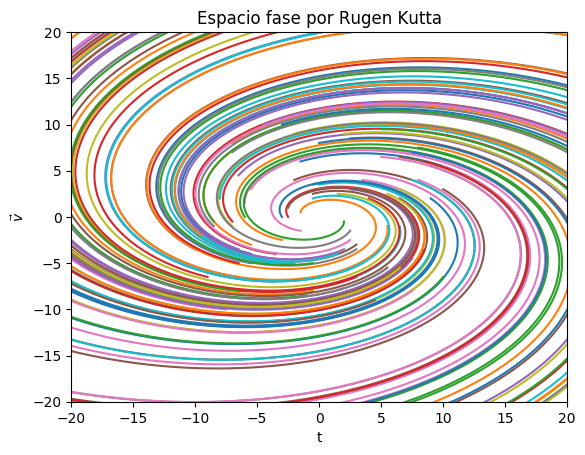

In [23]:
#Supondremos a=d=1...

#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
nueve(x,t)=[x[1]+4*x[2],-2*x[1]+x[2]]
 
for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(nueve,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;

Para $a=b=d=-1$, $c=0$

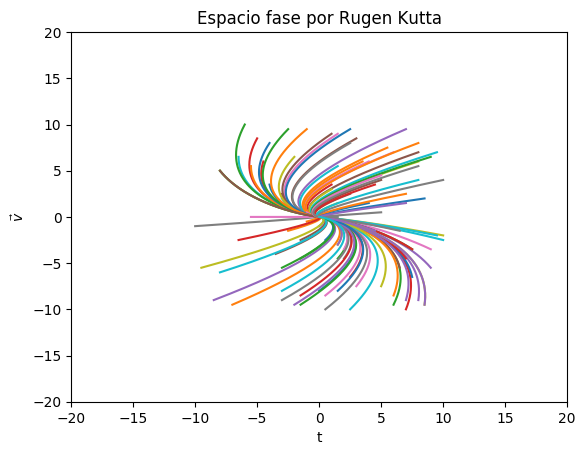

In [24]:
#Ponemos el intervalo donde queremos que lo grafique
list= -10:0.01:5;

#La función que queremos resolver.
diez(x,t)=[-x[1]-x[2],-x[2]]
for i in 1:100
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(diez,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-20,20)
    ylim(-20,20)
end;